Bu bir **regresyon** problemi çünkü bağımlı değişkenimiz salary, sayısal bir değişken.

In [1]:
###################################################
# PROJECT: SALARY PREDICTİON WITH MACHINE LEARNING
###################################################

# İş Problemi

# Maaş bilgileri ve 1986 yılına ait kariyer istatistikleri paylaşılan beyzbol
# oyuncularının maaş tahminleri için bir makine öğrenmesi projesi gerçekleştirilebilir mi?

# Veri seti hikayesi

# Bu veri seti orijinal olarak Carnegie Mellon Üniversitesi'nde bulunan StatLib kütüphanesinden alınmıştır.
# Veri seti 1988 ASA Grafik Bölümü Poster Oturumu'nda kullanılan verilerin bir parçasıdır.
# Maaş verileri orijinal olarak Sports Illustrated, 20 Nisan 1987'den alınmıştır.
# 1986 ve kariyer istatistikleri, Collier Books, Macmillan Publishing Company, New York tarafından yayınlanan
# 1987 Beyzbol Ansiklopedisi Güncellemesinden elde edilmiştir.


# AtBat: 1986-1987 sezonunda bir beyzbol sopası ile topa yapılan vuruş sayısı
# Hits: 1986-1987 sezonundaki isabet sayısı
# HmRun: 1986-1987 sezonundaki en değerli vuruş sayısı
# Runs: 1986-1987 sezonunda takımına kazandırdığı sayı
# RBI: Bir vurucunun vuruş yaptıgında koşu yaptırdığı oyuncu sayısı
# Walks: Karşı oyuncuya yaptırılan hata sayısı
# Years: Oyuncunun major liginde oynama süresi (sene)
# CAtBat: Oyuncunun kariyeri boyunca topa vurma sayısı
# CHits: Oyuncunun kariyeri boyunca yaptığı isabetli vuruş sayısı
# CHmRun: Oyucunun kariyeri boyunca yaptığı en değerli sayısı
# CRuns: Oyuncunun kariyeri boyunca takımına kazandırdığı sayı
# CRBI: Oyuncunun kariyeri boyunca koşu yaptırdırdığı oyuncu sayısı
# CWalks: Oyuncun kariyeri boyunca karşı oyuncuya yaptırdığı hata sayısı
# League: Oyuncunun sezon sonuna kadar oynadığı ligi gösteren A ve N seviyelerine sahip bir faktör
# Division: 1986 sonunda oyuncunun oynadığı pozisyonu gösteren E ve W seviyelerine sahip bir faktör
# PutOuts: Oyun icinde takım arkadaşınla yardımlaşma
# Assits: 1986-1987 sezonunda oyuncunun yaptığı asist sayısı
# Errors: 1986-1987 sezonundaki oyuncunun hata sayısı
# Salary: Oyuncunun 1986-1987 sezonunda aldığı maaş(bin uzerinden)
# NewLeague: 1987 sezonunun başında oyuncunun ligini gösteren A ve N seviyelerine sahip bir faktör

In [1]:
from helpers import * 
#buradaki yıldız helpers içindeki her şeyi import et demek

In [2]:
hitters = pd.read_csv("hitters.csv")
df = hitters.copy()

## Exploratory Data Analysis (EDA)

**Genel Resim**

In [199]:
check_df(df)

##################### Shape #####################
(322, 20)
##################### Types #####################
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
##################### Head #####################
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    32

**Değişken Analizleri**

In [3]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 322
Variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [344]:
cat_cols

['League', 'Division', 'NewLeague']

In [202]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

count    322.000000
mean     380.928571
std      153.404981
min       16.000000
1%        20.420000
5%       161.000000
10%      194.100000
20%      221.800000
30%      281.300000
40%      321.800000
50%      379.500000
60%      430.200000
70%      490.000000
80%      535.600000
90%      584.900000
95%      609.900000
99%      658.590000
max      687.000000
Name: AtBat, dtype: float64


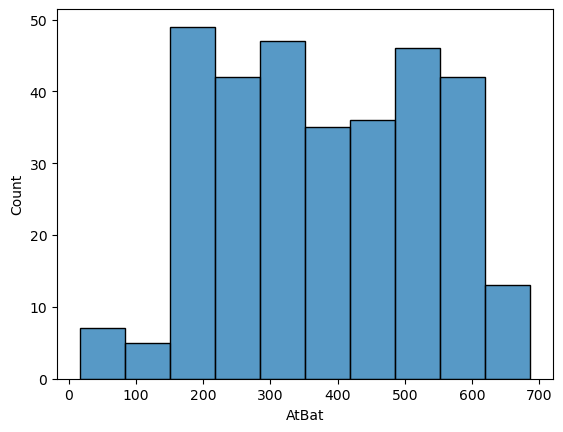

****************************************************
count    322.000000
mean     101.024845
std       46.454741
min        1.000000
1%         4.420000
5%        39.000000
10%       45.100000
20%       57.000000
30%       70.000000
40%       82.000000
50%       96.000000
60%      113.000000
70%      128.700000
80%      144.000000
90%      163.000000
95%      174.000000
99%      210.790000
max      238.000000
Name: Hits, dtype: float64


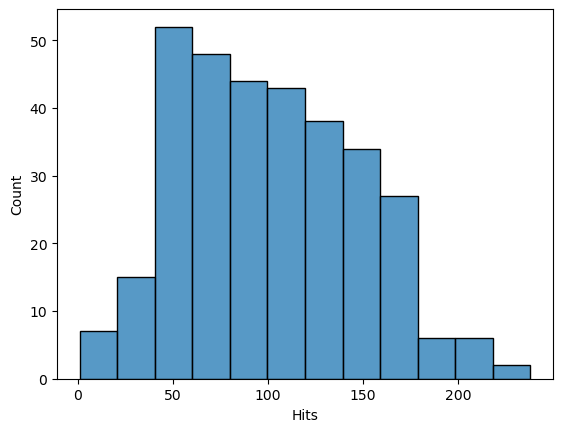

****************************************************
count    322.000000
mean      10.770186
std        8.709037
min        0.000000
1%         0.000000
5%         0.000000
10%        1.000000
20%        3.000000
30%        5.000000
40%        6.000000
50%        8.000000
60%       10.600000
70%       14.000000
80%       18.000000
90%       24.000000
95%       28.950000
99%       33.000000
max       40.000000
Name: HmRun, dtype: float64


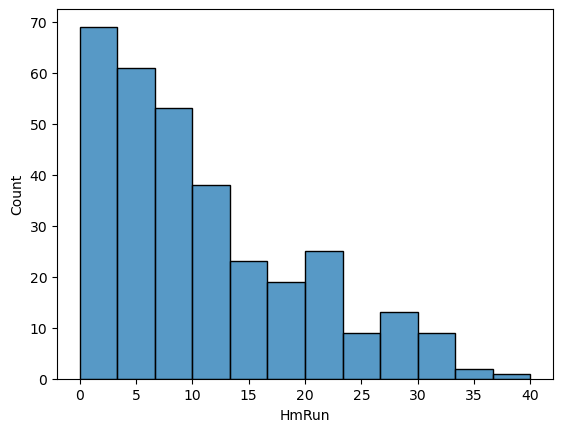

****************************************************
count    322.000000
mean      50.909938
std       26.024095
min        0.000000
1%         1.210000
5%        17.000000
10%       20.100000
20%       27.000000
30%       33.000000
40%       41.000000
50%       48.000000
60%       55.600000
70%       66.000000
80%       75.800000
90%       89.000000
95%       94.000000
99%      107.790000
max      130.000000
Name: Runs, dtype: float64


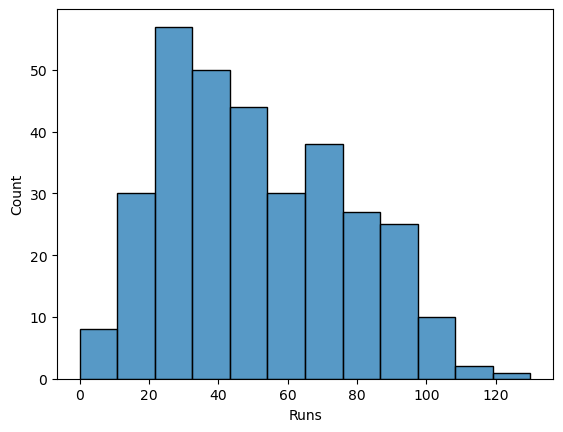

****************************************************
count    322.000000
mean      48.027950
std       26.166895
min        0.000000
1%         2.000000
5%        14.000000
10%       19.000000
20%       26.000000
30%       30.000000
40%       36.400000
50%       44.000000
60%       49.000000
70%       58.000000
80%       73.000000
90%       86.000000
95%       96.000000
99%      112.370000
max      121.000000
Name: RBI, dtype: float64


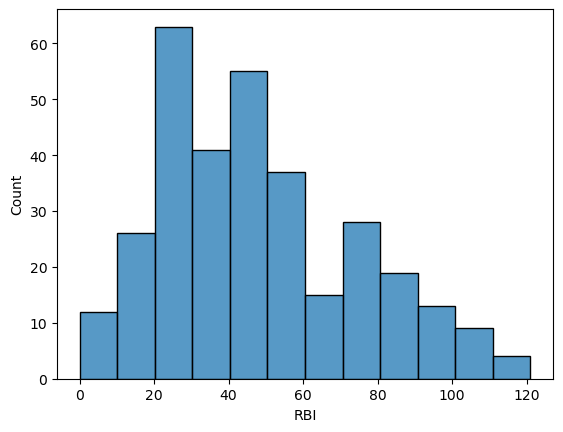

****************************************************
count    322.000000
mean      38.742236
std       21.639327
min        0.000000
1%         1.000000
5%        11.050000
10%       15.000000
20%       20.000000
30%       24.000000
40%       30.000000
50%       35.000000
60%       40.000000
70%       48.700000
80%       59.000000
90%       69.900000
95%       78.000000
99%       93.580000
max      105.000000
Name: Walks, dtype: float64


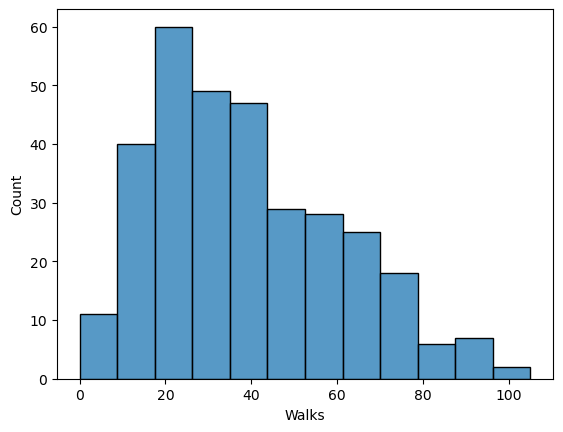

****************************************************
count    322.000000
mean       7.444099
std        4.926087
min        1.000000
1%         1.000000
5%         1.000000
10%        2.000000
20%        3.000000
30%        4.000000
40%        5.000000
50%        6.000000
60%        7.600000
70%       10.000000
80%       12.000000
90%       15.000000
95%       17.000000
99%       19.790000
max       24.000000
Name: Years, dtype: float64


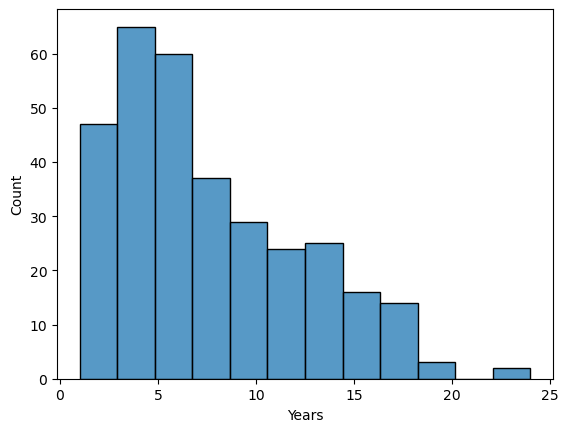

****************************************************
count      322.00000
mean      2648.68323
std       2324.20587
min         19.00000
1%          41.00000
5%         216.50000
10%        342.20000
20%        667.60000
30%        963.40000
40%       1402.20000
50%       1928.00000
60%       2654.00000
70%       3365.00000
80%       4483.00000
90%       6123.40000
95%       7125.60000
99%       8749.97000
max      14053.00000
Name: CAtBat, dtype: float64


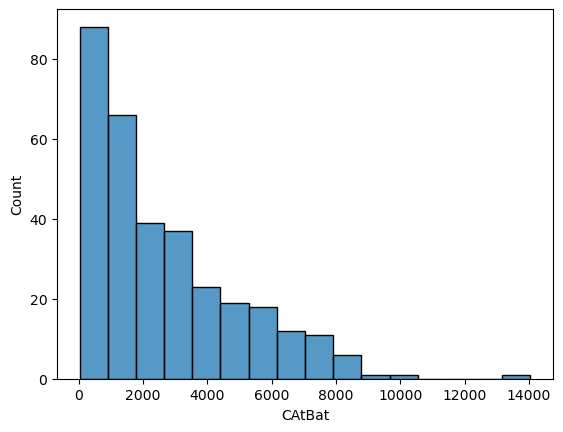

****************************************************
count     322.000000
mean      717.571429
std       654.472627
min         4.000000
1%          9.840000
5%         54.000000
10%        86.000000
20%       164.600000
30%       238.000000
40%       355.800000
50%       508.000000
60%       708.200000
70%       911.100000
80%      1229.200000
90%      1659.600000
95%      2017.150000
99%      2500.340000
max      4256.000000
Name: CHits, dtype: float64


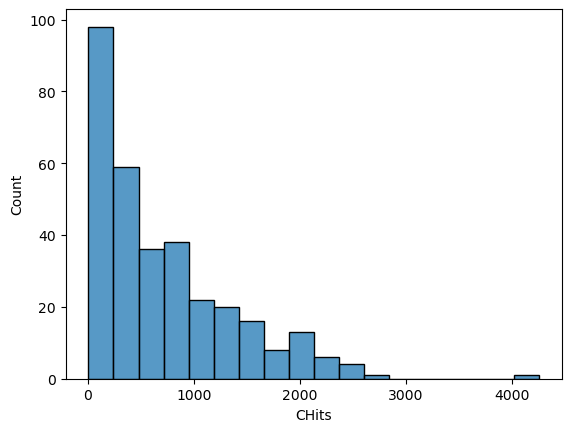

****************************************************
count    322.000000
mean      69.490683
std       86.266061
min        0.000000
1%         0.000000
5%         2.000000
10%        4.000000
20%       10.200000
30%       16.300000
40%       27.400000
50%       37.500000
60%       51.200000
70%       72.400000
80%      103.800000
90%      194.900000
95%      265.650000
99%      373.120000
max      548.000000
Name: CHmRun, dtype: float64


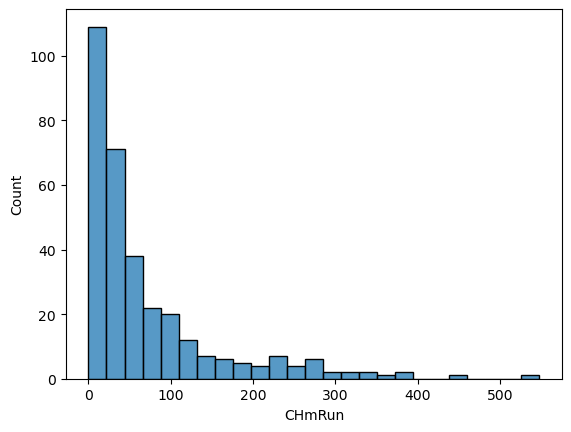

****************************************************
count     322.000000
mean      358.795031
std       334.105886
min         1.000000
1%          3.630000
5%         27.000000
10%        38.100000
20%        80.400000
30%       117.300000
40%       181.000000
50%       247.000000
60%       333.000000
70%       443.400000
80%       627.200000
90%       895.700000
95%      1032.300000
99%      1174.370000
max      2165.000000
Name: CRuns, dtype: float64


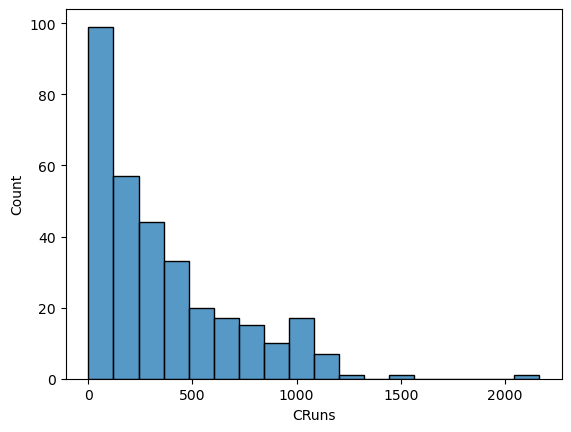

****************************************************
count     322.000000
mean      330.118012
std       333.219617
min         0.000000
1%          4.630000
5%         22.050000
10%        34.100000
20%        70.200000
30%       106.300000
40%       149.000000
50%       220.500000
60%       303.600000
70%       379.100000
80%       496.200000
90%       861.600000
95%      1071.750000
99%      1310.850000
max      1659.000000
Name: CRBI, dtype: float64


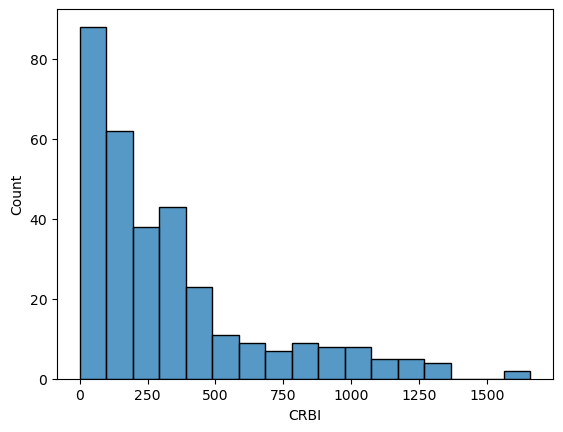

****************************************************
count     322.000000
mean      260.239130
std       267.058085
min         0.000000
1%          4.000000
5%         15.050000
10%        30.100000
20%        55.000000
30%        82.000000
40%       117.400000
50%       170.500000
60%       226.600000
70%       300.700000
80%       421.000000
90%       643.900000
95%       817.600000
99%      1139.140000
max      1566.000000
Name: CWalks, dtype: float64


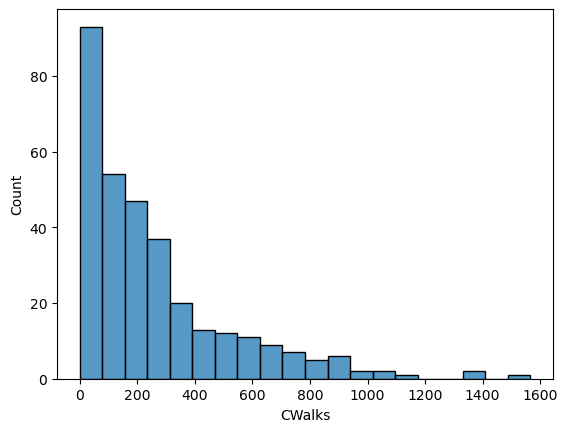

****************************************************
count     322.000000
mean      288.937888
std       280.704614
min         0.000000
1%          0.000000
5%         33.200000
10%        62.200000
20%        99.600000
30%       132.000000
40%       167.000000
50%       212.000000
60%       257.400000
70%       303.000000
80%       365.800000
90%       685.600000
95%       910.650000
99%      1301.190000
max      1378.000000
Name: PutOuts, dtype: float64


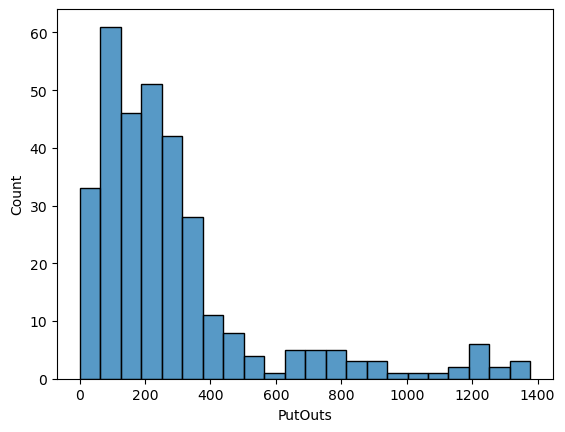

****************************************************
count    322.000000
mean     106.913043
std      136.854876
min        0.000000
1%         0.000000
5%         0.000000
10%        2.000000
20%        5.200000
30%        9.000000
40%       15.400000
50%       39.500000
60%       76.800000
70%      134.800000
80%      210.800000
90%      353.300000
95%      431.450000
99%      478.160000
max      492.000000
Name: Assists, dtype: float64


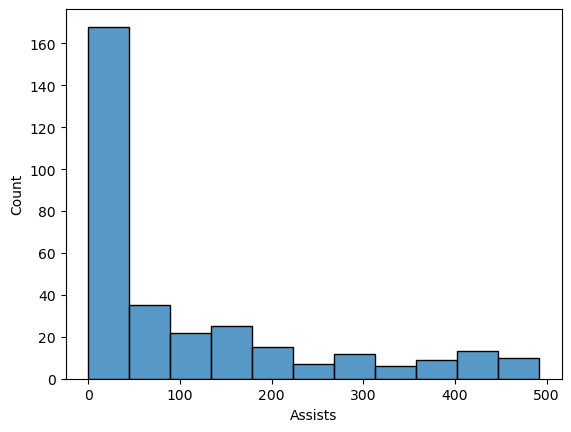

****************************************************
count    322.000000
mean       8.040373
std        6.368359
min        0.000000
1%         0.000000
5%         0.000000
10%        1.000000
20%        3.000000
30%        4.000000
40%        5.000000
50%        6.000000
60%        8.000000
70%       10.000000
80%       13.000000
90%       17.000000
95%       20.000000
99%       25.790000
max       32.000000
Name: Errors, dtype: float64


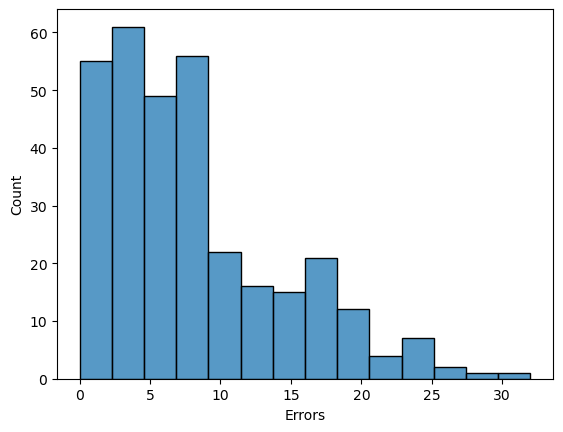

****************************************************
count     263.000000
mean      535.925882
std       451.118681
min        67.500000
1%         70.000000
5%         86.600000
10%       100.000000
20%       155.000000
30%       221.000000
40%       300.000000
50%       425.000000
60%       538.000000
70%       700.000000
80%       809.000000
90%      1048.666600
95%      1346.000000
99%      2032.886540
max      2460.000000
Name: Salary, dtype: float64


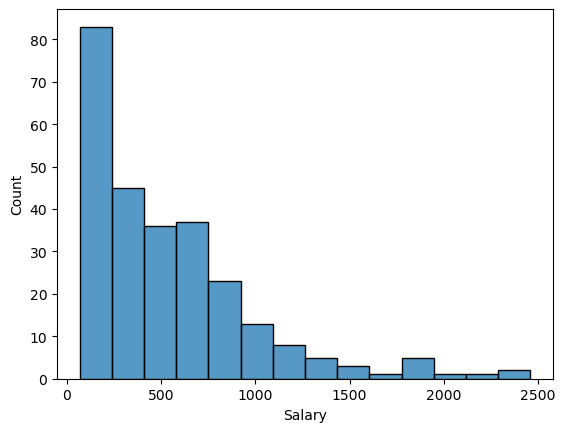

****************************************************


In [203]:
#sayısal değişken özet
for col in num_cols:
    num_summary(df,col,plot=True)

   League      Ratio
A     175  54.347826
N     147  45.652174


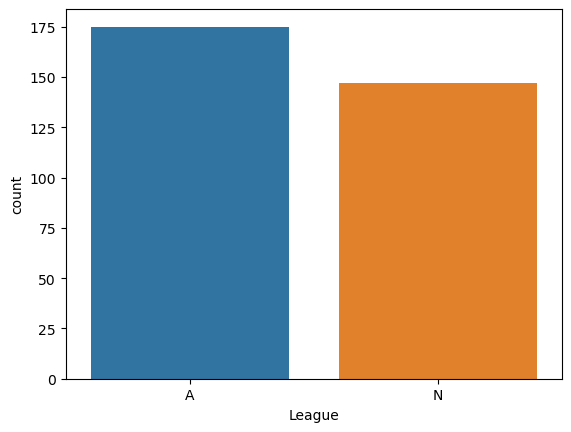

****************************************************
   Division      Ratio
W       165  51.242236
E       157  48.757764


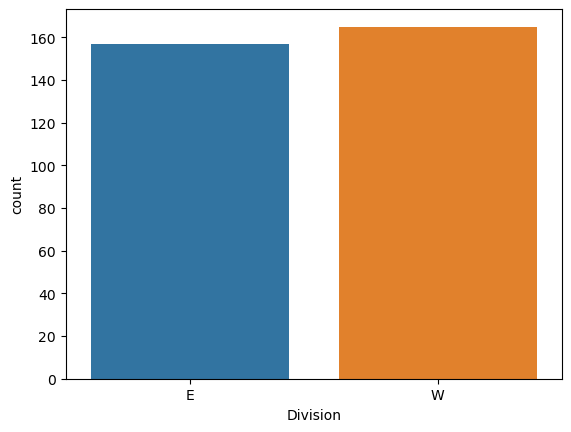

****************************************************
   NewLeague      Ratio
A        176  54.658385
N        146  45.341615


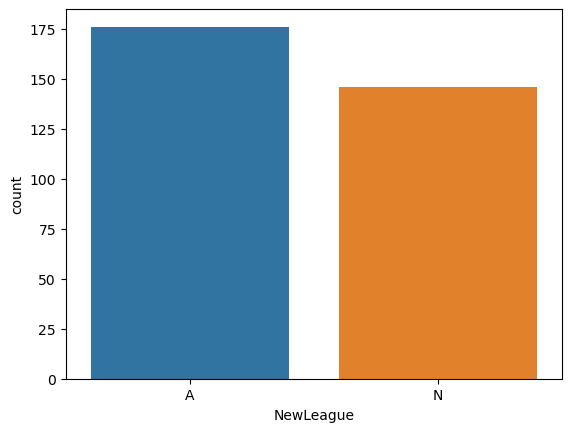

****************************************************


In [204]:
#kategorik özet
for col in cat_cols:
    cat_summary(df, col, plot=True)

In [205]:
#hedef değişkenin nümeriklerle analizi
for col in num_cols:
    target_summary_with_num(df, "Salary", col)

          AtBat
Salary         
67.500    181.0
68.000    209.0
70.000    248.6
75.000    236.4
80.000    399.0
...         ...
1940.000  514.0
1975.000  677.0
2127.333   20.0
2412.500  618.0
2460.000  495.0

[150 rows x 1 columns]


---------------------------
           Hits
Salary         
67.500     41.0
68.000     54.0
70.000     57.4
75.000     58.2
80.000    102.0
...         ...
1940.000  144.0
1975.000  238.0
2127.333    1.0
2412.500  200.0
2460.000  151.0

[150 rows x 1 columns]


---------------------------
          HmRun
Salary         
67.500      1.0
68.000      3.0
70.000      3.2
75.000      3.0
80.000      3.0
...         ...
1940.000    0.0
1975.000   31.0
2127.333    0.0
2412.500   20.0
2460.000   17.0

[150 rows x 1 columns]


---------------------------
           Runs
Salary         
67.500     15.0
68.000     25.0
70.000     27.8
75.000     25.2
80.000     56.0
...         ...
1940.000   67.0
1975.000  117.0
2127.333    0.0
2412.500   98.0
2460.000   61.0

[150 

In [206]:
#hedef değişkenin kategoriklerle analizi
for col in cat_cols:
    target_summary_with_cat(df, "Salary", col)

League
   TARGET_MEAN  Count      Ratio
A   541.999547    175  54.347826
N   529.117500    147  45.652174


---------------------------
Division
   TARGET_MEAN  Count      Ratio
E   624.271364    157  48.757764
W   450.876873    165  51.242236


---------------------------
NewLeague
   TARGET_MEAN  Count      Ratio
A   537.113028    176  54.658385
N   534.553852    146  45.341615


---------------------------


In [207]:
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117,0.394771
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038,0.438675
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318,0.343028
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475,0.419859
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370,0.449457
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382,0.443867
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140,0.400657
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922,0.526135
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756,0.548910
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115,0.524931


In [208]:
df.corrwith(df["Salary"]).sort_values(ascending=False)

Salary     1.000000
CRBI       0.566966
CRuns      0.562678
CHits      0.548910
CAtBat     0.526135
CHmRun     0.524931
CWalks     0.489822
RBI        0.449457
Walks      0.443867
Hits       0.438675
Runs       0.419859
Years      0.400657
AtBat      0.394771
HmRun      0.343028
PutOuts    0.300480
Assists    0.025436
Errors    -0.005401
dtype: float64

## Feature Engineering

**Outliers**

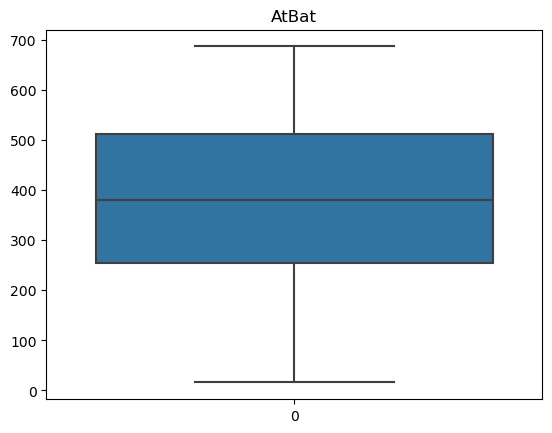

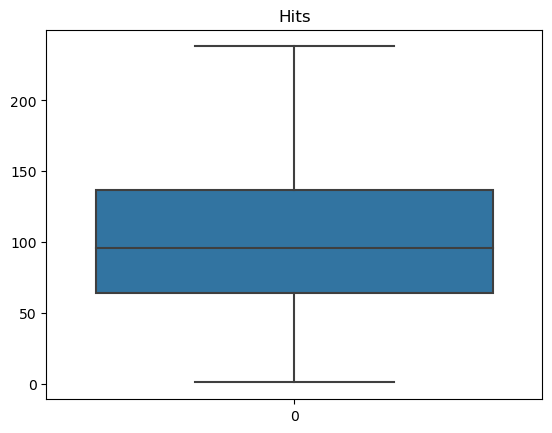

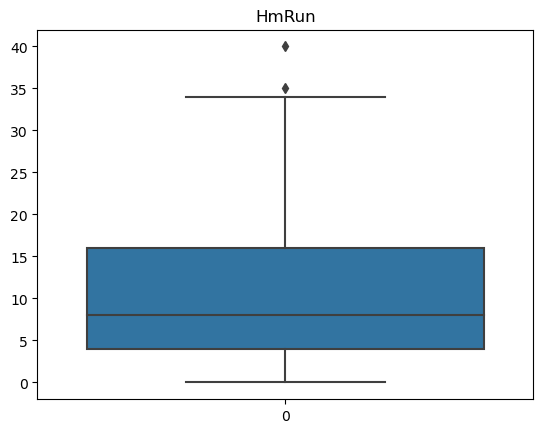

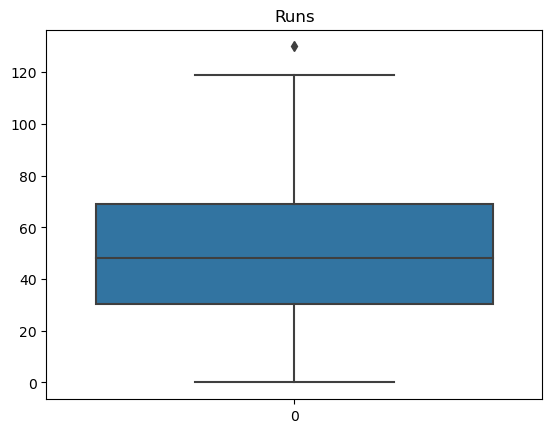

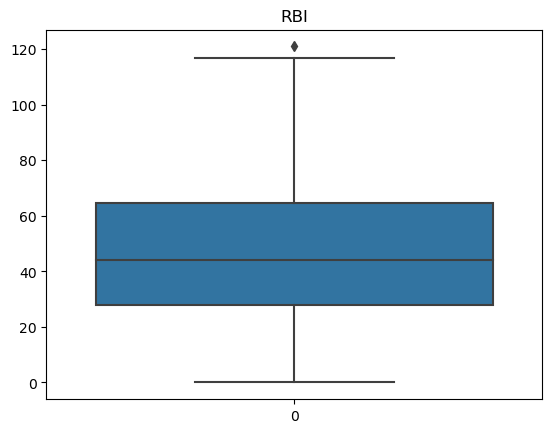

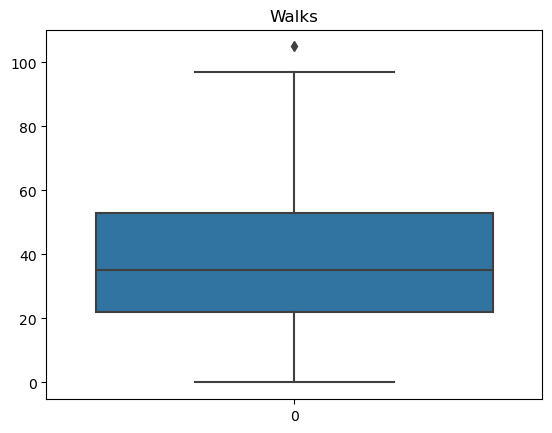

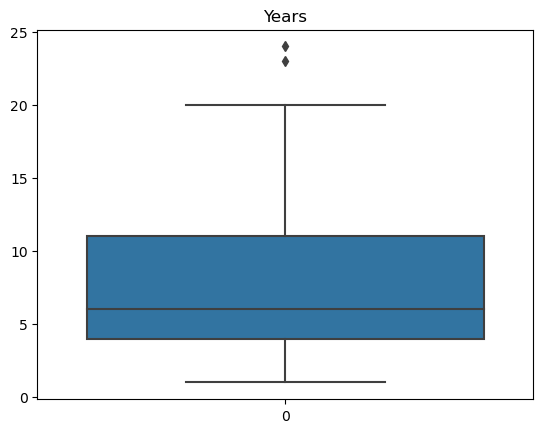

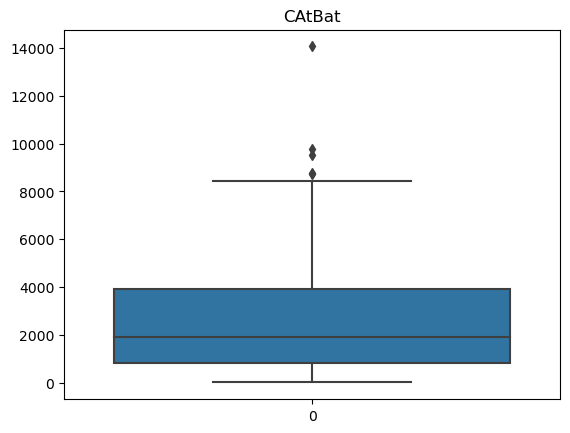

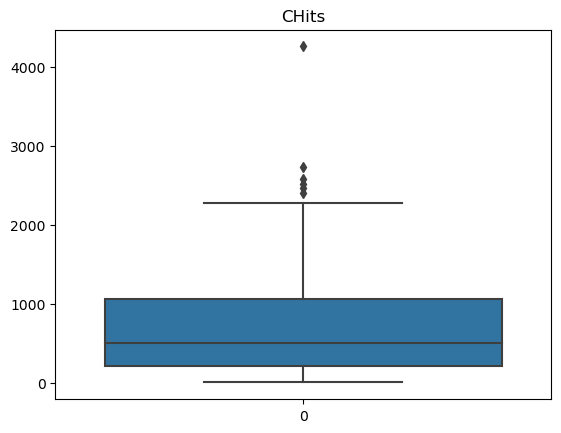

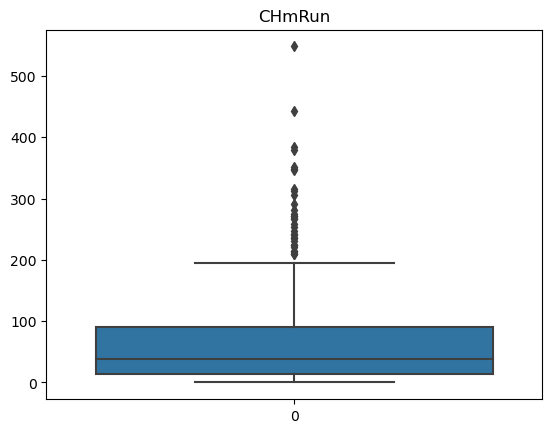

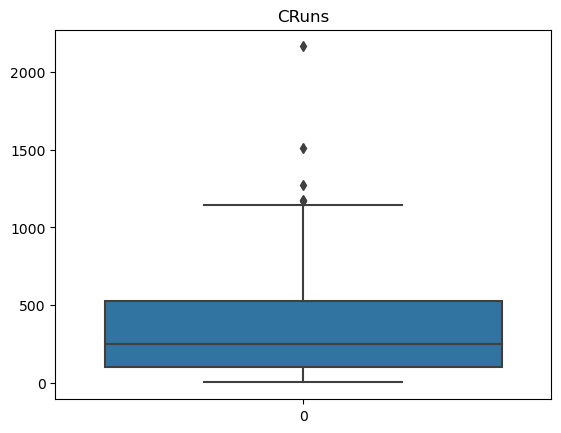

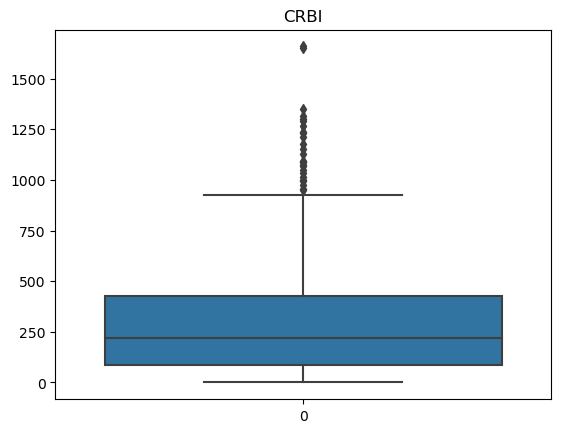

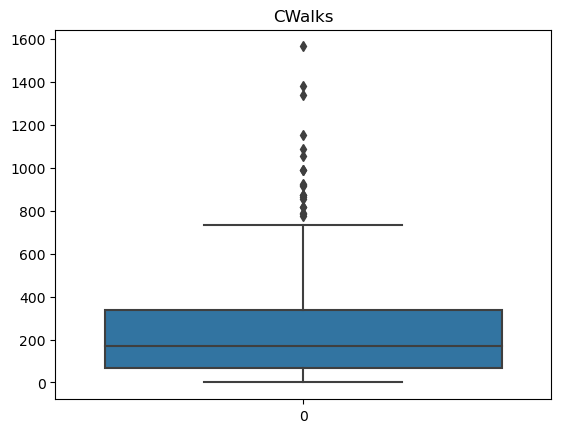

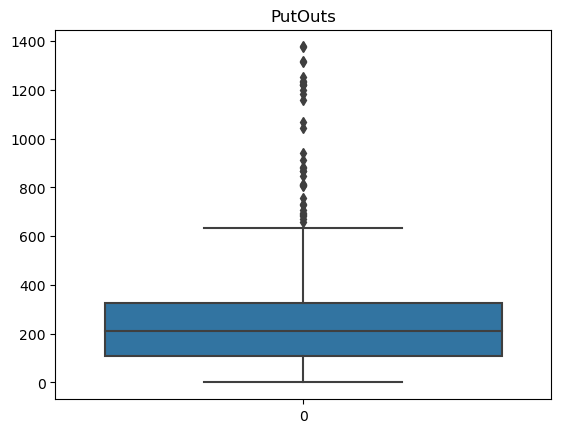

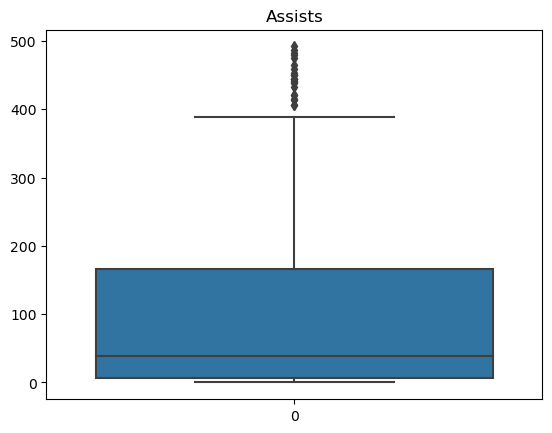

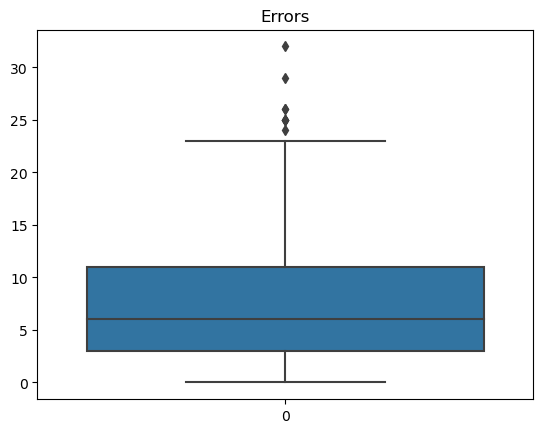

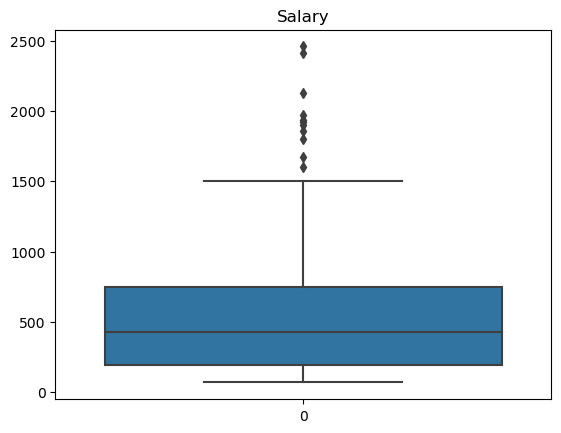

In [209]:
for col in num_cols:
    plt.title(col)
    sns.boxplot(df[col])
    plt.show(block=True)

In [4]:
# outlier_thresholds ön tanımlı değer q1 = 0.05, q3 = 0.95 ayarlı, değiştirebilirsin.
# low_limit, up_limit = outlier_thresholds(df, num_cols, q1 = , q3 = )

# Aykırı Değer Analizi ve Baskılama İşlemi
for col in num_cols:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


**Missing Values**

In [5]:
missing_values_table(df)

        n_miss  ratio
Salary      59  18.32


In [255]:
df[df["Salary"].isnull()]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
15,183,39,3,20,15,11,3,201,42,3,20,16,11,A,W,118,0,0,NaN,A
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,A,W,912,88,9,NaN,A
22,22,10,1,4,2,1,6,84,26,2,9,9,3,A,W,812,84,11,NaN,A
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,A,W,127,221,7,NaN,A
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,N,W,1378,102,8,NaN,N
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,A,E,70,149,12,NaN,A
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,A,E,0,0,0,NaN,A
39,241,61,1,34,12,14,1,241,61,1,34,12,14,N,W,166,172,10,NaN,N
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,N,W,103,84,5,NaN,N


In [334]:
#eksik değerleri silmemiz gerekecek çünkü hedef değişkende bulunuyor, doldurmak doğru olmayabilir.

In [6]:
df.dropna(inplace=True)

In [378]:
#dropna yapınca resetlemek zorunda kaldık çünkü ilk değer silinmişti, yapmamız gerek mi emin değilim.
# df.reset_index(inplace=True)
# df.drop(["index"], axis = 1, inplace = True)

In [7]:
missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


**Feature Extraction**

In [8]:
df.columns = [col.upper() for col in df.columns]

In [9]:
# RATIO OF VARIABLES

# PLAYER TYPE : RUNNER
df["NEW_C_RUNNER"] = df["CRBI"] / df["CHITS"]
# PLAYER TYPE : HIT AND RUN
df["NEW_C_HIT-AND-RUN"] = df["CRUNS"] / df["CHITS"]
# MOST VALUABLE HIT RATIO IN HITS
df["NEW_C_HMHITS_RATIO"] = df["CHMRUN"] / df["CHITS"]
# MOST VALUABLE HIT RATIO IN ALL SHOTS

#Annual Averages
df["NEW_CATBAT_MEAN"] = df["CATBAT"] / df["YEARS"]
df["NEW_CHITS_MEAN"] = df["CHITS"] / df["YEARS"]
df["NEW_CHMRUN_MEAN"] = df["CHMRUN"] / df["YEARS"]
df["NEW_CRUNS_MEAN"] = df["CRUNS"] / df["YEARS"]
df["NEW_CRBI_MEAN"] = df["CRBI"] / df["YEARS"]
df["NEW_CWALKS_MEAN"] = df["CWALKS"] / df["YEARS"]


# PLAYER LEVEL
df.loc[(df["YEARS"] <= 2), "NEW_YEARS_LEVEL"] = "Junior"
df.loc[(df["YEARS"] > 2) & (df['YEARS'] <= 5), "NEW_YEARS_LEVEL"] = "Mid"
df.loc[(df["YEARS"] > 5) & (df['YEARS'] <= 10), "NEW_YEARS_LEVEL"] = "Senior"
df.loc[(df["YEARS"] > 10), "NEW_YEARS_LEVEL"] = "Expert"


# PLAYER LEVEL X DIVISION

df.loc[(df["NEW_YEARS_LEVEL"] == "Junior") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Junior-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Junior") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Junior-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Mid") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Mid-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Mid") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Mid-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Senior") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Senior-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Senior") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Senior-West"
df.loc[(df["NEW_YEARS_LEVEL"] == "Expert") & (df["DIVISION"] == "E"), 'NEW_DIV_CAT'] = "Expert-East"
df.loc[(df["NEW_YEARS_LEVEL"] == "Expert") & (df["DIVISION"] == "W"), 'NEW_DIV_CAT'] = "Expert-West"

# Player Promotion to Next League
df.loc[(df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "N"), "NEW_PLAYER_PROGRESS"] = "StandN"
df.loc[(df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "A"), "NEW_PLAYER_PROGRESS"] = "StandA"
df.loc[(df["LEAGUE"] == "N") & (df["NEWLEAGUE"] == "A"), "NEW_PLAYER_PROGRESS"] = "Descend"
df.loc[(df["LEAGUE"] == "A") & (df["NEWLEAGUE"] == "N"), "NEW_PLAYER_PROGRESS"] = "Ascend"

In [10]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 263
Variables: 32
cat_cols: 6
num_cols: 26
cat_but_car: 0
num_but_cat: 0


**Encoding** (for Categorical)

In [11]:
# label encoding

In [12]:
binary_cols = [col for col in df.columns if
               df[col].dtype not in [int, float] and df[col].nunique() == 2]

In [13]:
binary_cols

['LEAGUE', 'DIVISION', 'NEWLEAGUE']

In [14]:
for col in binary_cols:
    df = label_encoder(df, col)

In [15]:
# rare encoding

In [16]:
rare_analyser(df, "SALARY", cat_cols)

LEAGUE : 2
   COUNT     RATIO  TARGET_MEAN
0    139  0.528517   541.999547
1    124  0.471483   529.117500


DIVISION : 2
   COUNT     RATIO  TARGET_MEAN
0    129  0.490494   624.271364
1    134  0.509506   450.876873


NEWLEAGUE : 2
   COUNT     RATIO  TARGET_MEAN
0    141  0.536122   537.113028
1    122  0.463878   534.553852


NEW_YEARS_LEVEL : 4
        COUNT     RATIO  TARGET_MEAN
Expert     65  0.247148   755.108169
Junior     38  0.144487   186.916658
Mid        78  0.296578   359.339744
Senior     82  0.311787   691.891988


NEW_DIV_CAT : 8
             COUNT     RATIO  TARGET_MEAN
Expert-East     32  0.121673   809.777000
Expert-West     33  0.125475   702.095970
Junior-East     16  0.060837   229.302063
Junior-West     22  0.083650   156.090909
Mid-East        37  0.140684   427.905405
Mid-West        41  0.155894   297.463415
Senior-East     44  0.167300   798.109295
Senior-West     38  0.144487   568.903526


NEW_PLAYER_PROGRESS : 4
         COUNT     RATIO  TARGET_MEAN
Asc

In [16]:
df = rare_encoder(df, 0.01, cat_cols)

In [17]:
# one-hot encoding

In [18]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [19]:
ohe_cols

['NEW_YEARS_LEVEL', 'NEW_DIV_CAT', 'NEW_PLAYER_PROGRESS']

In [20]:
df = one_hot_encoder(df, ohe_cols, drop_first=True)

**Feature scaling** (for Numerical)

In [367]:
np.isinf(df).sum() # bunu araştırdım çünkü bazı özellik eklemelerinde sonsuz değer oluşabiliyor ve bu yüzden scaler hata verebiliyor

ATBAT                          0
HITS                           0
HMRUN                          0
RUNS                           0
RBI                            0
WALKS                          0
YEARS                          0
CATBAT                         0
CHITS                          0
CHMRUN                         0
CRUNS                          0
CRBI                           0
CWALKS                         0
LEAGUE                         0
DIVISION                       0
PUTOUTS                        0
ASSISTS                        0
ERRORS                         0
SALARY                         0
NEWLEAGUE                      0
NEW_C_RUNNER                   0
NEW_C_HIT-AND-RUN              0
NEW_C_HMHITS_RATIO             0
NEW_CATBAT_MEAN                0
NEW_CHITS_MEAN                 0
NEW_CHMRUN_MEAN                0
NEW_CRUNS_MEAN                 0
NEW_CRBI_MEAN                  0
NEW_CWALKS_MEAN                0
NEW_YEARS_LEVEL_Junior         0
NEW_YEARS_

In [1]:
# robust kullandım çünkü aykırı değerlere sahip veri setlerinde daha iyi sonuç veriyor

In [22]:
scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [23]:
df.head()

,ATBAT,HITS,HMRUN,RUNS,RBI,WALKS,YEARS,CATBAT,CHITS,CHMRUN,...,NEW_DIV_CAT_Expert-West,NEW_DIV_CAT_Junior-East,NEW_DIV_CAT_Junior-West,NEW_DIV_CAT_Mid-East,NEW_DIV_CAT_Mid-West,NEW_DIV_CAT_Senior-East,NEW_DIV_CAT_Senior-West,NEW_PLAYER_PROGRESS_Descend,NEW_PLAYER_PROGRESS_StandA,NEW_PLAYER_PROGRESS_StandN
1,-0.402464,-0.314286,-0.153846,-0.708861,-0.219512,0.058824,1.333333,0.498031,0.378860,0.374194,...,1,0,0,0,0,0,0,0,0,1
2,0.271047,0.385714,0.692308,0.354430,0.609756,1.147059,-0.500000,-0.100722,-0.070071,0.296774,...,0,0,0,0,1,0,0,0,1,0
3,0.340862,0.542857,0.846154,0.329114,0.756098,0.000000,0.833333,1.212927,1.257720,2.387097,...,0,0,0,0,0,0,0,0,0,1
4,-0.377823,-0.228571,0.076923,-0.329114,-0.121951,-0.205882,-0.666667,-0.503609,-0.492874,-0.361290,...,0,1,0,0,0,0,0,0,0,1
5,0.743326,0.942857,-0.384615,0.556962,0.097561,-0.058824,0.833333,0.812664,0.732779,-0.270968,...,1,0,0,0,0,0,0,0,1,0


## Machine Learning

In [24]:
X = df.drop("SALARY", axis=1)
y = df[["SALARY"]]

**Model**

In [25]:
from sklearn.ensemble import RandomForestRegressor 

In [26]:
rf_reg_model = RandomForestRegressor().fit(X, y)

In [33]:
#model hatası, before

In [27]:
np.mean(np.sqrt(-cross_val_score(rf_reg_model,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="neg_mean_squared_error")))

0.5020431156712234

**Hyperparameter Optimization**

In [29]:
rf_reg_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [30]:
rf_params = {"max_depth": [5, 8, None],
             "max_features": [3, 5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 15, 20],
             "n_estimators": [100, 200, 500]} 

In [32]:
rf_best_grid = GridSearchCV(rf_reg_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [35]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 7,
 'min_samples_split': 5,
 'n_estimators': 200}

In [36]:
rf_reg_final = rf_reg_model.set_params(**rf_best_grid.best_params_).fit(X, y)

In [34]:
#optimizasyon sonrası model hatası, after

In [37]:
np.mean(np.sqrt(-cross_val_score(rf_reg_final,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="neg_mean_squared_error")))

0.488243641286089

In [38]:
#hatayı düşürmüş olduk başarılı